In [1]:
import numpy as np
import torch

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
def plot_experiments(data, labels, title, best_value, ylim=None):
    num_iterations = 100
    t = torch.linspace(0, num_iterations, num_iterations + 1)

    b = 1
    for i, algo in enumerate(labels):
        if algo == "sobol":
            color = "k"
        else:
            color = colors[i - 1]
        label = labels[algo][0]

        utility = torch.log(best_value - data["all_set_utilities"][algo])
        mean_utility = utility.mean(dim=0)
        std_utility = utility.std(dim=0)
        plt.plot(t, mean_utility, label=label, linewidth=4, color=color)
        plt.fill_between(
            t,
            mean_utility + b * std_utility,
            mean_utility - b * std_utility,
            alpha=0.1,
            color=color,
            edgecolor="white",
            linewidth=2,
        )
    if ylim is not None:
        plt.ylim(ylim)
    plt.xlim(0, num_iterations)
    plt.xticks(np.linspace(0, num_iterations, 11), fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(title, fontsize=27.5)
    plt.grid(alpha=0.5)
    return None

In [3]:
colors = pl.cm.viridis(np.linspace(0, 1, 11))

p_greedy = {
    "sobol": ["Sobol"],
    "eui": ["EUI"],
    "eui-rg-0.1": [r"$p=0.1$"],
    "eui-rg-0.2": [r"$p=0.2$"],
    "eui-rg-0.3": [r"$p=0.3$"],
    "eui-rg-0.4": [r"$p=0.4$"],
    "eui-rg-0.5": [r"$p=0.5$"],
    "eui-rg-0.6": [r"$p=0.6$"],
    "eui-rg-0.7": [r"$p=0.7$"],
    "eui-rg-0.8": [r"$p=0.8$"],
    "eui-rg-0.9": [r"$p=0.9$"],
    "eui-rg-1.0": ["AEUI"],
}

threshold = {
    "sobol": ["Sobol"],
    "eui": ["EUI"],
    "eui-thresh-0.1": [r"$p=0.1$"],
    "eui-thresh-0.2": [r"$p=0.2$"],
    "eui-thresh-0.3": [r"$p=0.3$"],
    "eui-thresh-0.4": [r"$p=0.4$"],
    "eui-thresh-0.5": [r"$p=0.5$"],
    "eui-thresh-0.6": [r"$p=0.6$"],
    "eui-thresh-0.7": [r"$p=0.7$"],
    "eui-thresh-0.8": [r"$p=0.8$"],
    "eui-thresh-0.9": [r"$p=0.9$"],
    "eui-rg-1.0": ["AEUI"],
}

In [4]:
gmm2_data = torch.load("data/gmm2_hv_data.pt")
gmm3_data = torch.load("data/gmm3_hv_data.pt")
gmm4_data = torch.load("data/gmm4_hv_data.pt")

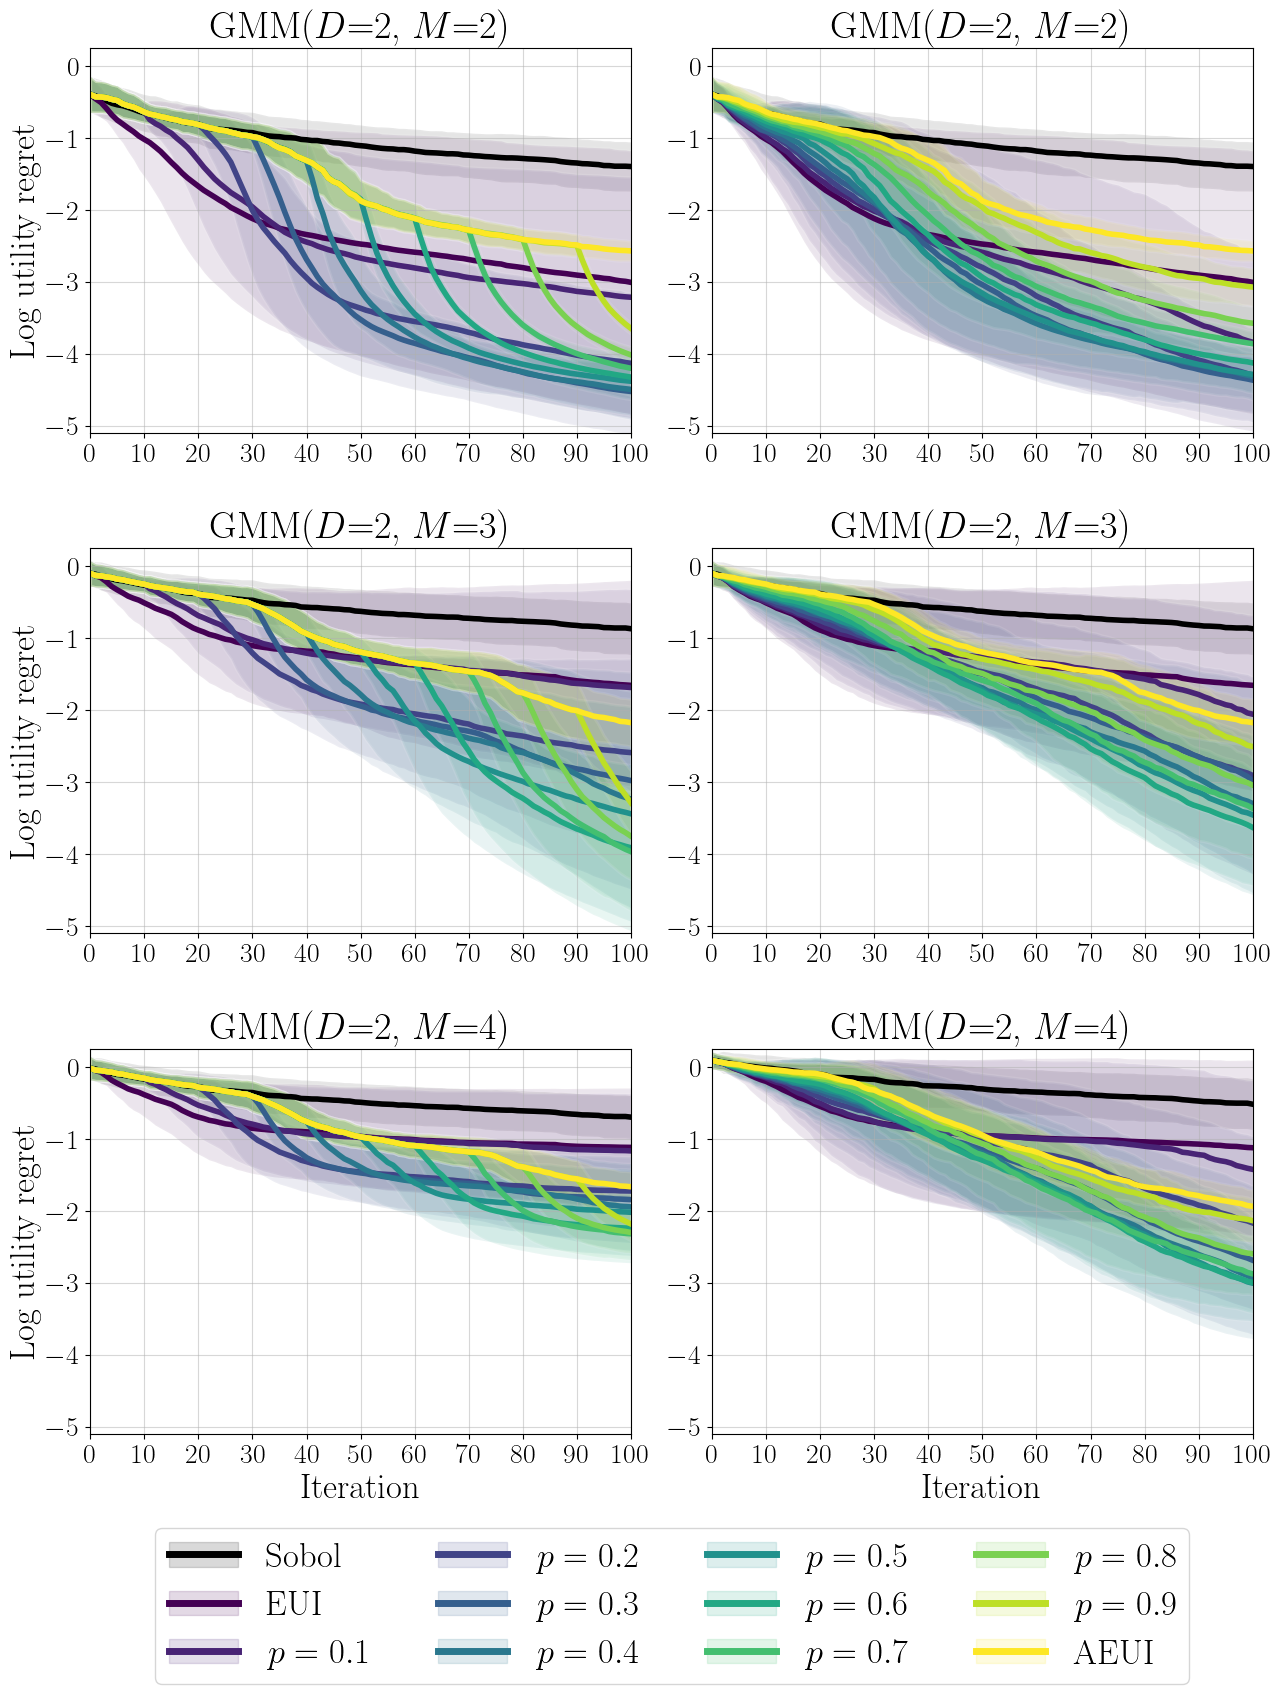

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.3
)

plt.subplot(3, 2, 1)
plot_experiments(
    data=gmm2_data,
    labels=threshold,
    title=r"GMM($D$=2, $M$=2)",
    best_value=1.1051,
    ylim=[-5.1, 0.25],
)
plt.ylabel("Log utility regret", fontsize=25)

plt.subplot(3, 2, 2)
plot_experiments(
    data=gmm2_data,
    labels=p_greedy,
    title=r"GMM($D$=2, $M$=2)",
    best_value=1.1051,
    ylim=[-5.1, 0.25],
)
#######################################################
plt.subplot(3, 2, 3)
plot_experiments(
    data=gmm3_data,
    labels=threshold,
    title=r"GMM($D$=2, $M$=3)",
    best_value=1.1639,
    ylim=[-5.1, 0.25],
)
plt.ylabel("Log utility regret", fontsize=25)

plt.subplot(3, 2, 4)
plot_experiments(
    data=gmm3_data,
    labels=p_greedy,
    title=r"GMM($D$=2, $M$=3)",
    best_value=1.1639,
    ylim=[-5.1, 0.25],
)
#######################################################
plt.subplot(3, 2, 5)
plot_experiments(
    data=gmm3_data,
    labels=threshold,
    title=r"GMM($D$=2, $M$=4)",
    best_value=1.2365,
    ylim=[-5.1, 0.25],
)
plt.ylabel("Log utility regret", fontsize=25)
plt.xlabel("Iteration", fontsize=25)


plt.subplot(3, 2, 6)
plot_experiments(
    data=gmm4_data,
    labels=p_greedy,
    title=r"GMM($D$=2, $M$=4)",
    best_value=1.2365,
    ylim=[-5.1, 0.25],
)
plt.xlabel("Iteration", fontsize=25)

#######################################################
black_line = mlines.Line2D([], [], color="black", linestyle="-", linewidth=5)
black_patch = mpatches.Patch(color="black", alpha=0.15)
handles = [(black_line, black_patch)]

for c in colors:
    handles += [
        (
            mlines.Line2D([], [], color=c, linestyle="-", linewidth=5),
            mpatches.Patch(color=c, alpha=0.15),
        )
    ]

labels = [
    "Sobol",
    "EUI",
    r"$p=0.1$",
    "$p=0.2$",
    r"$p=0.3$",
    "$p=0.4$",
    r"$p=0.5$",
    r"$p=0.6$",
    "$p=0.7$",
    r"$p=0.8$",
    "$p=0.9$",
    "AEUI",
]

axes[2, 0].legend(
    handles=handles, labels=labels, loc=(0.12, -0.65), ncol=4, fontsize=25
)

plt.show()